# Capstone 2: HMEQ

# Data Cleansing

DATASET: https://www.kaggle.com/ajay1735/hmeq-data

In [1]:
#Importing all necessary packages & dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm

df_raw = pd.read_csv("hmeq.csv")

In [2]:
#To identify null values of each column
print(df_raw.shape)
df_raw.info()

(5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [3]:
#Replace all reason null values with "Other" as there are other less common reasons for loans. 
df_raw["REASON"].fillna("Other",inplace=True)

#Replace all job null values with "Unknown" as "Other" already exists. 
df_raw["JOB"].fillna("Unknown",inplace=True)

df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,Other,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
#To identify null count of each numeric variable column. Can see that missing values are spread out among variables instead of being from single column, so removing a single variable will not be necessary. 
df_raw.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [32]:
#Dropped all rows with null values in numeric variable column. 
df_clean = df_raw.dropna(axis=0, how='any')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3515 non-null   int64  
 1   LOAN     3515 non-null   int64  
 2   MORTDUE  3515 non-null   float64
 3   VALUE    3515 non-null   float64
 4   REASON   3515 non-null   object 
 5   JOB      3515 non-null   object 
 6   YOJ      3515 non-null   float64
 7   DEROG    3515 non-null   float64
 8   DELINQ   3515 non-null   float64
 9   CLAGE    3515 non-null   float64
 10  NINQ     3515 non-null   float64
 11  CLNO     3515 non-null   float64
 12  DEBTINC  3515 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 384.5+ KB


In [33]:
#Reset index to ignore dropped rows.
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
1,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
4,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [12]:
#To replace categorical column values into numerical values. 
cleanup_reason = {"DebtCon":1,"HomeImp":2, "Other":3}
df_clean["REASON"].replace(cleanup_reason)

cleanup_job = {"Mgr":1,"Office":2,"ProfExe":3,"Sales":4,"Self":5,"Other":6,"Unknown":7}
df_clean["JOB"].replace(cleanup_job)

df_clean.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548.0,40320.0,2,6,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
1,1,1800,28502.0,43034.0,2,6,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
2,0,2300,102370.0,120953.0,2,2,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,1,2400,34863.0,47471.0,2,1,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
4,0,2400,98449.0,117195.0,2,2,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


# Data Analysis

# Descriptive Statistics

<AxesSubplot:>

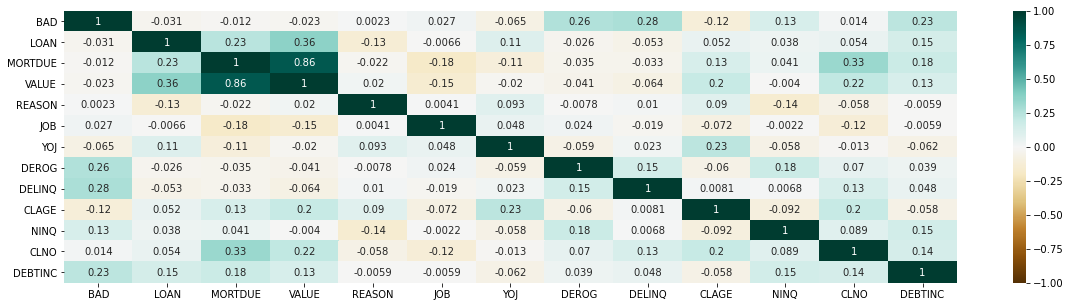

In [14]:
#Correlation matrix to identify any high correlation between variables.  
plt.figure(figsize=(20, 5))
sns.heatmap(df_clean.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')

The particularly noticable correlation is between MORTDUE and VALUE, which makes sense as higher the value of the property, the more likely it is that the mortgage due is higher.

In [15]:
#Created two dataframes by paid/defaulted to separately analyze variables by "BAD" column. 
df_paid = df_clean[df_clean.BAD !=1]
df_default = df_clean[df_clean.BAD !=0]

In [16]:
#First glance of defaulted vs. paid based on descriptive statistics.
df_mean = pd.concat([df_paid.mean(), df_default.mean()], axis=1)
print(df_mean)

                     0              1
BAD           0.000000       1.000000
LOAN      19295.352464   18072.815534
MORTDUE   75788.554273   73905.721683
VALUE    107260.962882  102879.275081
REASON        1.325951       1.330097
JOB           3.841859       4.029126
YOJ           9.319401       7.566343
DEROG         0.099813       0.631068
DELINQ        0.202121       0.980583
CLAGE       184.058081     150.211552
NINQ          0.963194       1.644013
CLNO         21.912352      22.391586
DEBTINC      33.542040      40.123029


Few variables show high statistical significance, but will be good to take a deeper look into each variable by using visualizations. 

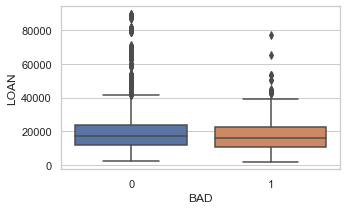

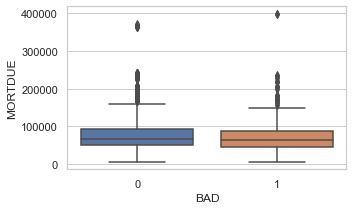

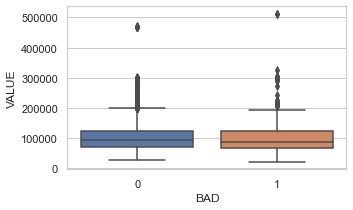

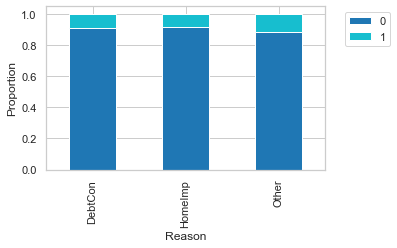

In [89]:
#Boxplot of LOAN
plt.figure(figsize=(5, 3))
sns.boxplot(y="LOAN",x="BAD", data=df_clean)
plt.show()

#Boxplot of MORTDUE
plt.figure(figsize=(5, 3))
sns.boxplot(y="MORTDUE",x="BAD", data=df_clean)
plt.show()

#Boxplot of VALUE
plt.figure(figsize=(5, 3))
sns.boxplot(y="VALUE",x="BAD", data=df_clean)
plt.show()

#Stacked bar for REASON
cross_tab_prop = pd.crosstab(index=df_stats["REASON"],
                             columns=df_stats["BAD"],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 3))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Reason")
plt.ylabel("Proportion")
plt.show()

Box plots of LOAN, MORTDUE, VALUE, and REASON don't appear to show much difference between defaulted and paid clients. 

This could indicate that the nature/reason of the loan may not be a strong predictor of defaulting, but rather variables related to client demographics and/or client credit information. 

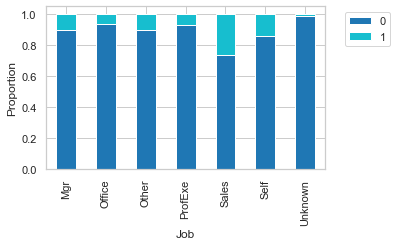

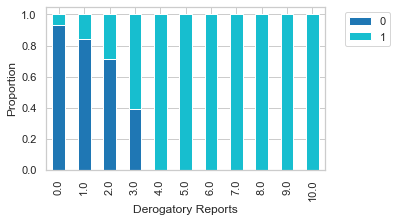

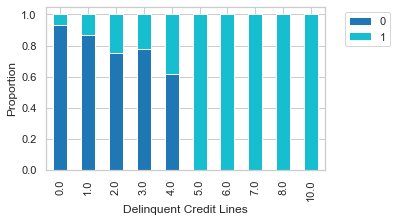

In [91]:
#Proportional bar graph of JOB
cross_tab_prop = pd.crosstab(index=df_stats["JOB"],
                             columns=df_stats["BAD"],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 3))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Job")
plt.ylabel("Proportion")
plt.show()

#Proportional bar graph of DEROG
cross_tab_prop = pd.crosstab(index=df_stats["DEROG"],
                             columns=df_stats["BAD"],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 3))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Derogatory Reports")
plt.ylabel("Proportion")
plt.show()

#Proportional bar graph of DELINQ
cross_tab_prop = pd.crosstab(index=df_clean["DELINQ"],
                             columns=df_clean["BAD"],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 3))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Delinquent Credit Lines")
plt.ylabel("Proportion")
plt.show()

JOBS in sales appear to have higher defaulting rate than other careers. 
DEROG chart shows that no paid clients have more than 3 derogatory reports. 
DELINQ chart shows that no paid clients have more than 4 delinquent credit lines. 

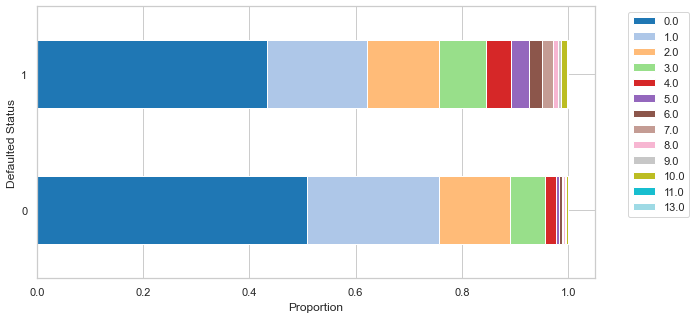

In [94]:
#Stacked bar graph to compare number of credit inquiries. 
cross_tab_prop = pd.crosstab(index=df_clean["BAD"],
                             columns=df_clean["NINQ"],
                             normalize="index")

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab20', 
                    figsize=(10, 5))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Proportion")
plt.ylabel("Defaulted Status")
plt.show()

Based on the bar graph above, paid clients appear to have less credit inquiries than defaulted clients. 

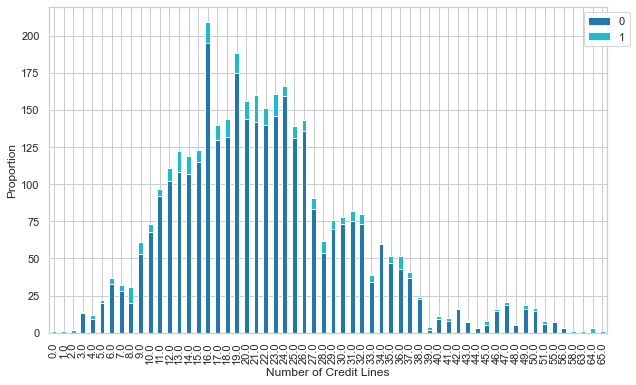

In [97]:
#Bar graph to show distribution of credit lines of customers. 
cross_tab_prop = pd.crosstab(index=df_clean["CLNO"],
                             columns=df_clean["BAD"])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Number of Credit Lines")
plt.ylabel("Proportion")
plt.show()

The number of CREDIT LINES don't appear to have sigificant impact on defaulting. 

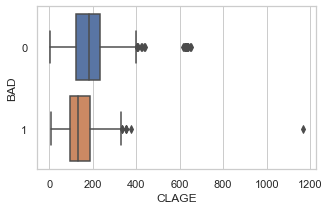

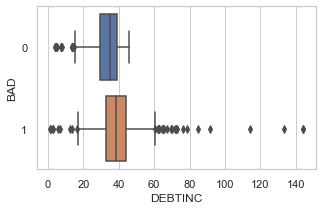

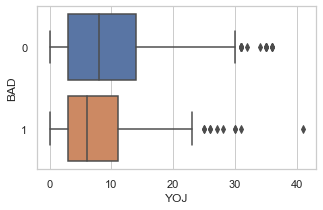

In [96]:
#Boxplot of CLAGE
plt.figure(figsize=(5, 3))
sns.boxplot(x="CLAGE",y="BAD", data=df_clean, orient='h')
plt.show()

#Boxplot of DEBTINC
plt.figure(figsize=(5, 3))
sns.boxplot(x="DEBTINC",y="BAD", data=df_clean, orient='h')
plt.show()

#Boxplot of YOJ
plt.figure(figsize=(5, 3))
sns.boxplot(x="YOJ",y="BAD", data=df_clean, orient='h')
plt.show()

CLAGE boxplot shows that paid clients have older credit lines. 
DEBTINC boxplot shows that defaulting clients have higher debt to income ratio. 
YOJ boxplot shows that paid clients have higher years at their present job. 

Based on the visuals created, the following variables appear to be variables that are stronger indicators of defaulting: JOBS, DEROG, DELINQ, NINQ, CLAGE, DEBTINC, YOJ. We will continue with this analysis by conducting a predictive analysis in hopes to create model that can help predict defaulting clients. 

# Predictive Analysis

# Linear Regression

Linear regression outputted R squared value of 0.254, which is extremely low to be able to predict an accurate outcome. Another predictive model will have to be used to achieve better predictability. 

In [70]:
X = df_clean[["LOAN","MORTDUE","VALUE","REASON","JOB","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"]]
y = df_clean["BAD"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BAD   R-squared (uncentered):                   0.254
Model:                            OLS   Adj. R-squared (uncentered):              0.251
Method:                 Least Squares   F-statistic:                              99.14
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                   5.81e-212
Time:                        22:56:51   Log-Likelihood:                         -200.44
No. Observations:                3515   AIC:                                      424.9
Df Residuals:                    3503   BIC:                                      498.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LOAN       -1.435e-06   4.25e-07     -3.375      0.001   -2.27e-06   -6.02e-07
MORTDUE    -3.966e-07   2.06e-07     -1.921      0.055   -8.01e-07    8.24e-09
VALUE       3.267e-07   1.71e-07      1.906      0.057    -9.3e-09    6.63e-07
REASON        -0.0121      0.008     -1.499      0.134      -0.028       0.004
JOB           -0.0014      0.002     -0.654      0.513      -0.006       0.003
YOJ           -0.0013      0.001     -2.117      0.034      -0.002   -9.32e-05
DEROG          0.0988      0.008     12.721      0.000       0.084       0.114
DELINQ         0.0863      0.006     15.477      0.000       0.075       0.097
CLAGE         -0.0003   5.52e-05     -6.095      0.000      -0.000      -0.000
NINQ           0.0094      0.003      3.181      0.001       0.004       0.015
CLNO          -0.0018      0.000     -3.579      0.000      -0.003      -0.001
DEBTINC        0.0058      0.000     12.785      0.000       0.005       0.007
==============================================================================
Omnibus:                     1861.887   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10215.178
Skew:                           2.602   Prob(JB):                         0.00
Kurtosis:                       9.531   Cond. No.                     2.79e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Logistical regression

In [21]:
#Importing additional necessary packages
!pip install imblearn
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [49]:
#Created separate dataset to be used for predictive model later in notebook. 
df_stats = df_raw.dropna(axis=0, how='any')
df_stats.reset_index(drop=True, inplace=True)
df_stats.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
1,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
4,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [50]:
#Creating separate columns for "REASON" and "JOB" into binary. 
cat_vars=["REASON","JOB"]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_stats[var], prefix=var)
    data1=df_stats.join(cat_list)
    df_stats=data1
    
cat_vars=["REASON","JOB"]
data_vars=df_stats.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [51]:
data_final=df_stats[to_keep]
data_final.columns.values

array(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon',
       'REASON_HomeImp', 'REASON_Other', 'JOB_Mgr', 'JOB_Office',
       'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'JOB_Unknown'],
      dtype=object)

In [54]:
#Upsampling defaulted using SMOTE algorithm. 
X = data_final.loc[:, data_final.columns != 'BAD']
y = data_final.loc[:, data_final.columns == 'BAD']
y=y.astype('int')

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['BAD'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['BAD']==0]))
print("Number of subscription",len(os_data_y[os_data_y['BAD']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['BAD']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['BAD']==1])/len(os_data_X))

length of oversampled data is  4508
Number of no subscription in oversampled data 2254
Number of subscription 2254
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [57]:
#Recursive Feature Elimination (RFE) to choose best or worst performing features. 
data_final_vars=data_final.columns.values.tolist()
y=['BAD']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\leemi.DESKTOP-4TQ7U6R\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [58]:
cols=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon','REASON_HomeImp', 'REASON_Other', 'JOB_Mgr', 'JOB_Office','JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'JOB_Unknown']
X=os_data_X[cols]
y=os_data_y['BAD']

In [59]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.273195
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.606    
Dependent Variable: BAD              AIC:              2503.1300
Date:               2022-01-05 15:06 BIC:              2631.4021
No. Observations:   4508             Log-Likelihood:   -1231.6  
Df Model:           19               LL-Null:          -3124.7  
Df Residuals:       4488             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
----------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------
LOAN           -0.0000   0.0000  -4.2196 0.0000  -0.0000 -0.0000
MORTDUE        -0.0000   0.0000  -0.4754 0.6345  -0.0000  0.0000
VALUE        

In [60]:
#P-values for most variables are smaller than 0.05, except 2 variables "MORTDUE" and "YOJ". 
cols=['LOAN', 'VALUE', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon','REASON_HomeImp', 'REASON_Other', 'JOB_Mgr', 'JOB_Office','JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'JOB_Unknown']
X=os_data_X[cols]
y=os_data_y['BAD']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.273279
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.606    
Dependent Variable: BAD              AIC:              2499.8877
Date:               2022-01-05 15:40 BIC:              2615.3327
No. Observations:   4508             Log-Likelihood:   -1231.9  
Df Model:           17               LL-Null:          -3124.7  
Df Residuals:       4490             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
----------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------
LOAN           -0.0000   0.0000  -4.1799 0.0000  -0.0000 -0.0000
VALUE           0.0000   0.0000   5.0380 0.0000   0.0000  0.0000
DEROG        

P-values for all variables are all now smaller than 0.05. 

In [61]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [62]:
#Calculating accuracy 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[411 277]
 [189 476]]


Result shows 411 + 476 correct predictions and 277 + 189 incorrect predictions.  

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       688
           1       0.63      0.72      0.67       665

    accuracy                           0.66      1353
   macro avg       0.66      0.66      0.65      1353
weighted avg       0.66      0.66      0.65      1353



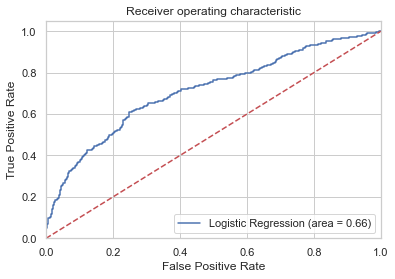

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Running a logistical regression yielded an accuracy rate of 66%. 